# 📌 Step 1: Import Libraries


In [30]:
import pandas as pd
import xgboost as xgb
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder




# 📌 Step 2: Load Dataset


In [31]:

# 2. Load Dataset (adjust path as needed)
data = pd.read_csv(r'F:\\Ahmed Dahy\\uneeq Interns Task\\3\\healthcare_dataset.csv')
print("Data shape:", data.shape)
print("Data loaded successfully")

data.head()

Data shape: (10000, 15)
Data loaded successfully


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [32]:
print(data.columns)


Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')


# 📌 Step 3: Select Most Relevant Features


In [33]:
selected_features = [
    'Age',
    'Gender',
    'Blood Type',
    'Admission Type',
    'Medication',
    'Test Results'
]

X = data[selected_features]
y = data['Medical Condition']

# 📌 Step 4: Encode Features and Target


In [34]:
X_encoded = pd.get_dummies(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 📌 Step 5: Split the Data


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42
)

# 📌 Step 6: Train XGBoost Classifier


In [36]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

c:\Users\ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:32:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

# 📌 Step 7: Evaluate the Model


In [37]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f" XGBoost Accuracy: {accuracy:.4f}")

 XGBoost Accuracy: 0.1625


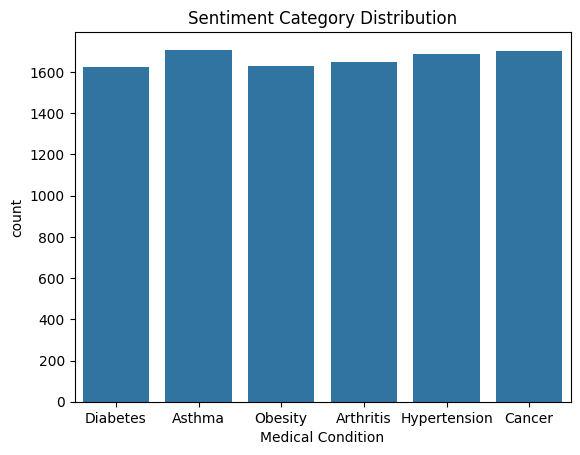

In [38]:
sns.countplot(x='Medical Condition', data=data)
plt.title('Sentiment Category Distribution')
plt.show()

# 📌 Step 8: Confusion Matrix


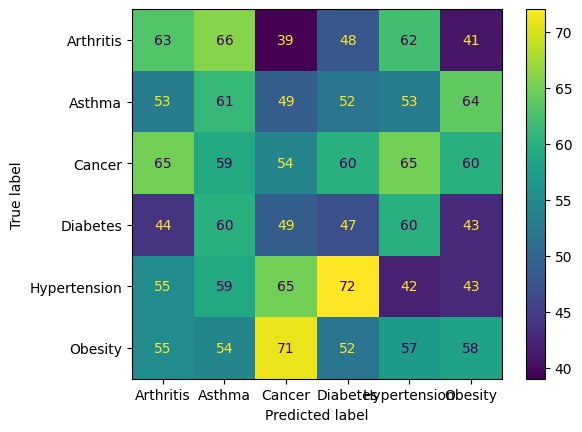

In [39]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()

# 📌 Step 7: Train KNN Model


In [40]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# 📌 Step 8: Evaluate the Model


In [41]:
y_pred = knn.predict(X_test)

print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

 Accuracy: 0.1735

 Classification Report:
              precision    recall  f1-score   support

   Arthritis       0.18      0.42      0.25       319
      Asthma       0.16      0.26      0.20       332
      Cancer       0.17      0.15      0.16       363
    Diabetes       0.16      0.09      0.11       303
Hypertension       0.14      0.06      0.08       336
     Obesity       0.23      0.08      0.12       347

    accuracy                           0.17      2000
   macro avg       0.17      0.18      0.15      2000
weighted avg       0.18      0.17      0.15      2000




Random Forest Accuracy: 0.1595

Random Forest Report:
               precision    recall  f1-score   support

           0       0.16      0.17      0.17       319
           1       0.16      0.16      0.16       332
           2       0.17      0.16      0.16       363
           3       0.13      0.14      0.13       303
           4       0.18      0.18      0.18       336
           5       0.15      0.14      0.15       347

    accuracy                           0.16      2000
   macro avg       0.16      0.16      0.16      2000
weighted avg       0.16      0.16      0.16      2000



Text(0.5, 1.0, 'Random Forest Confusion Matrix')

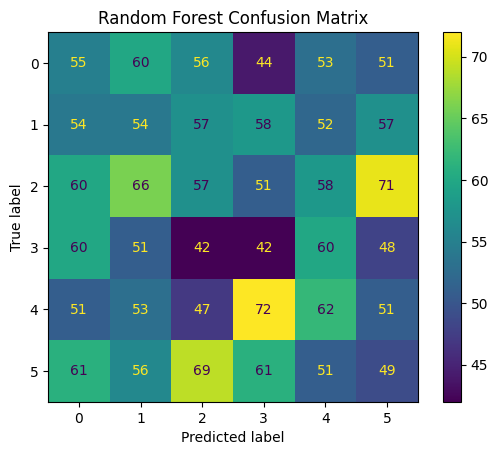

In [42]:
## Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
plt.show() 

print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nRandom Forest Report:\n", classification_report(y_test, rf_pred))
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred)
plt.title("Random Forest Confusion Matrix")


SGD (Linear SVM) Accuracy: 0.164

SGD Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       319
           1       0.00      0.00      0.00       332
           2       0.17      0.29      0.22       363
           3       0.16      0.73      0.26       303
           4       0.00      0.00      0.00       336
           5       0.00      0.00      0.00       347

    accuracy                           0.16      2000
   macro avg       0.06      0.17      0.08      2000
weighted avg       0.06      0.16      0.08      2000



c:\Users\ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Text(0.5, 1.0, 'SGD Confusion Matrix')

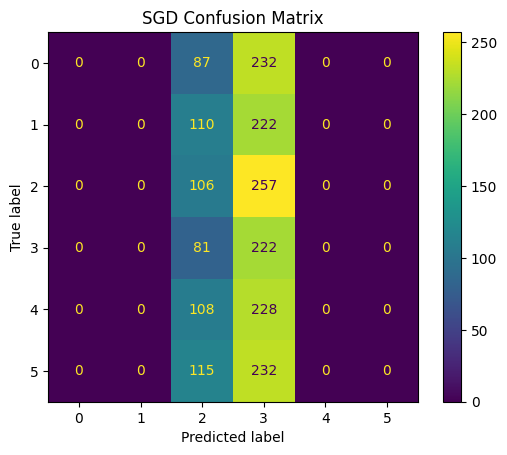

In [43]:
## SGD (Linear SVM)
sgd = SGDClassifier(loss='hinge', random_state=42)
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
plt.show()

print("\nSGD (Linear SVM) Accuracy:", accuracy_score(y_test, sgd_pred))
print("\nSGD Report:\n", classification_report(y_test, sgd_pred))
ConfusionMatrixDisplay.from_predictions(y_test, sgd_pred)
plt.title("SGD Confusion Matrix")

In [44]:
y.value_counts(normalize=True)


Medical Condition
Asthma          0.1708
Cancer          0.1703
Hypertension    0.1688
Arthritis       0.1650
Obesity         0.1628
Diabetes        0.1623
Name: proportion, dtype: float64